# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
#Definir URL
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

response = requests.get(url)
print(response.status_code)


if response.status_code ==403:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers=headers)
    time.sleep(5)
    html_data = request.text
    print(request.status_code)
html_data



403
200


'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\r\n\t\t<link rel="alternate" media="only screen and (max-width: 768px)" href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue">\r\n\t\t<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">\r\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of mo

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser")
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Reve

In [7]:
# Encontrar las tablas
tables = soup.find_all("table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2024</td>
 <td style="text-align:center">$97,690</td>
 </tr>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 

In [8]:
import pandas as pd

for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

# Create a DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

tesla_revenue.head()

,Date,Revenue
0,2024-12-31,25707
1,2024-09-30,25182
2,2024-06-30,25500
3,2024-03-31,21301
4,2023-12-31,25167


In [9]:
##Procesar el marco de datos

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,2024-12-31,25707
1,2024-09-30,25182
2,2024-06-30,25500
3,2024-03-31,21301
4,2023-12-31,25167


In [10]:
##alamcenar daos en sqlite
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [11]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

In [12]:
tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

[np.record(('2024-12-31', '25707'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('2024-09-30', '25182'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('2024-06-30', '25500'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('2024-03-31', '21301'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('2023-12-31', '25167'), dtype=[('Date', 'O'), ('Revenue', 'O')])]

In [13]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [14]:
# Check la data de la base de datos
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2024-12-31', '25707')
('2024-09-30', '25182')
('2024-06-30', '25500')
('2024-03-31', '21301')
('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')


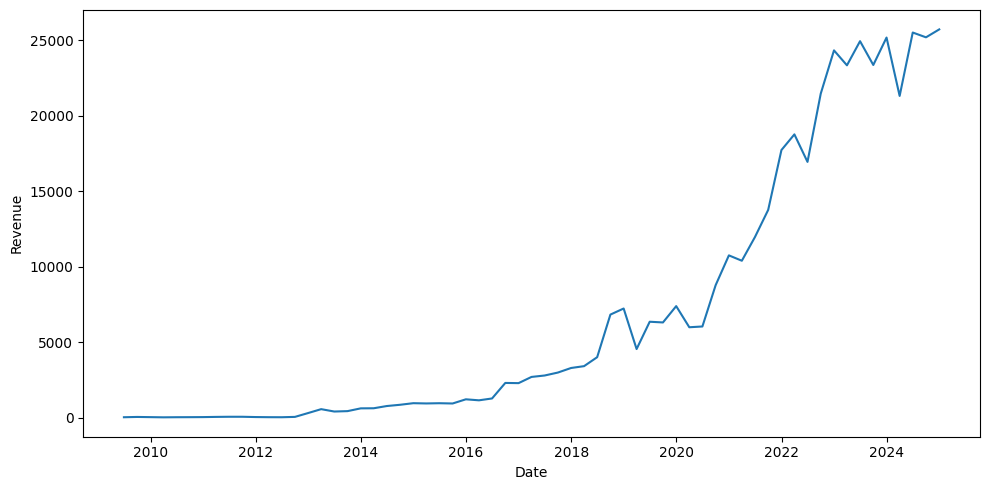

In [15]:
##visualizar datos 

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype('int')
sns.lineplot(data = tesla_revenue, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

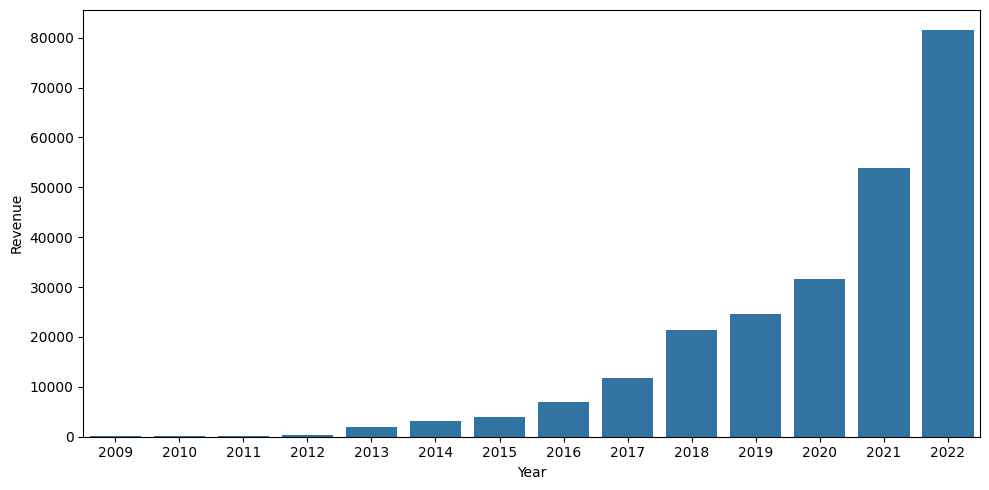

In [ ]:

#### Beneficio bruto anual
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna "Date" a formato datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Crear una nueva columna con solo el año
tesla_revenue["Year"] = tesla_revenue["Date"].dt.year

# Agrupar por año, pero excluyendo la columna "Date"
tesla_revenue_yearly = tesla_revenue.groupby("Year", as_index=False)["Revenue"].sum()

# Graficar
fig, axis = plt.subplots(figsize=(10, 5))
sns.barplot(data=tesla_revenue_yearly[tesla_revenue_yearly["Year"] < 2023], x="Year", y="Revenue", ax=axis)

plt.tight_layout()
plt.show()


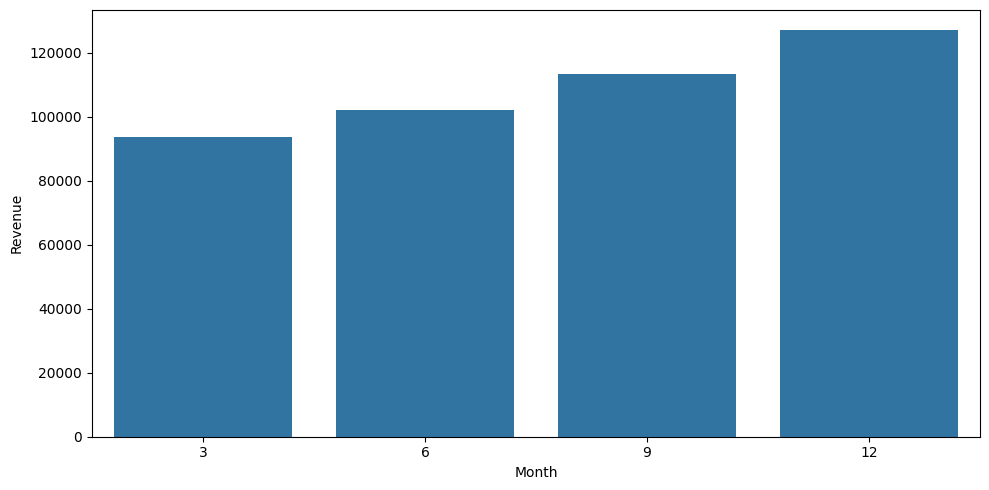

In [20]:
#### Beneficio bruto mensual

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna con el número del mes
tesla_revenue["Month"] = tesla_revenue["Date"].dt.month

# Agrupar por mes
tesla_revenue_monthly = tesla_revenue.groupby("Month", as_index=False)["Revenue"].sum()

# Graficar
fig, axis = plt.subplots(figsize=(10, 5))
sns.barplot(data=tesla_revenue_monthly, x="Month", y="Revenue", ax=axis)

plt.tight_layout()
plt.show()
